In [1]:
import os
import sys
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from utils import *
import numpy as np
import tensorflow as tf
from  model_functions import *
%matplotlib inline

In [2]:
model = load_vgg_model("Pretrained vgg/imagenet-vgg-verydeep-19.mat")

C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


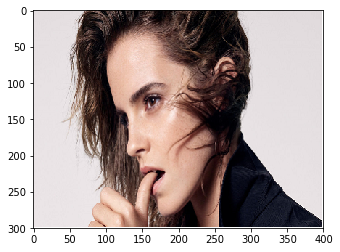

In [3]:
content_image = scipy.misc.imread("content/emma1.png")
imshow(content_image)

C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


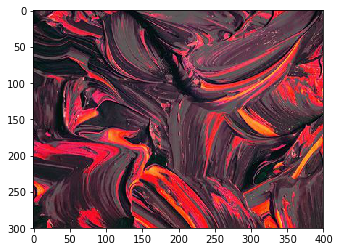

In [4]:
style_image = scipy.misc.imread("styles/style4.jpg")
imshow(style_image)

In [5]:
STYLE_LAYERS = [
    ('conv1_1', 0.25),
    ('conv2_1', 0.25),
    ('conv3_1', 0.25),
    ('conv4_1', 0.25),
    ('conv5_1', 0.25)]

In [6]:
tf.reset_default_graph()

with tf.Session() as test:
    np.random.seed(3)
    J_content = np.random.randn()    
    J_style = np.random.randn()
    J = total_cost(J_content, J_style)
    print("J = " + str(J))

J = 84.21454373874882


In [7]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [8]:
content_image = scipy.misc.imread("content/emma1.png")
content_image = reshape_and_normalize_image(content_image)
content_image.shape

C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


(1, 300, 400, 3)

In [9]:
style_image = scipy.misc.imread("styles/style4.jpg")
style_image = reshape_and_normalize_image(style_image)
style_image.shape

C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


(1, 300, 400, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


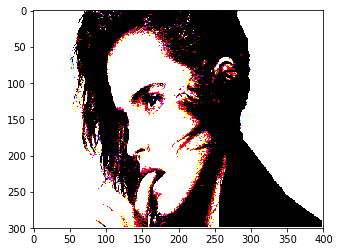

In [10]:
generated_image = generate_noise_image(content_image)
imshow(generated_image[0])

In [11]:
model = load_vgg_model("Pretrained vgg/imagenet-vgg-verydeep-19.mat")
sess.run(model['input'].assign(content_image))

# Select the output tensor of layer conv4_2
out = model['conv4_2']

# Set a_C to be the hidden layer activation from the layer we have selected
a_C = sess.run(out)

# Set a_G to be the hidden layer activation from same layer. Here, a_G references model['conv4_2'] 
# and isn't evaluated yet.
a_G = out

# Compute the content cost
J_content = compute_content_cost(a_C, a_G)

In [12]:
sess.run(model['input'].assign(style_image))
J_style = compute_style_cost(model, STYLE_LAYERS, sess)

In [13]:
J = total_cost(J_content, J_style, alpha = 30, beta = 70)
optimizer = tf.train.AdamOptimizer(2.0)
train_step = optimizer.minimize(J)

In [14]:
model_nn(sess, generated_image, model, train_step, J, J_content, J_style)

Iteration 0 :
total cost = 53202320000.0
content cost = 8139.4033
style cost = 760029630.0
Iteration 20 :
total cost = 6418681300.0
content cost = 28315.912
style cost = 91683310.0
Iteration 40 :
total cost = 2414602200.0
content cost = 28332.182
style cost = 34482176.0
Iteration 60 :
total cost = 1383476900.0
content cost = 29571.941
style cost = 19751282.0
Iteration 80 :
total cost = 958766850.0
content cost = 30476.328
style cost = 13683608.0
Iteration 100 :
total cost = 725759740.0
content cost = 31199.787
style cost = 10354625.0
Iteration 120 :
total cost = 582005570.0
content cost = 31793.14
style cost = 8300739.5
Iteration 140 :
total cost = 485830880.0
content cost = 32293.693
style cost = 6926601.0
Iteration 160 :
total cost = 417513860.0
content cost = 32712.312
style cost = 5950464.0
Iteration 180 :
total cost = 366769400.0
content cost = 33075.223
style cost = 5225388.0


array([[[[  92.88669  ,   81.66581  ,  101.85531  ],
         [  92.49737  ,   44.571903 ,   60.07522  ],
         [  96.99045  ,   55.363136 ,   55.896725 ],
         ...,
         [  64.805145 ,   81.29777  ,  112.506096 ],
         [  51.900387 ,   85.535545 ,   99.85304  ],
         [  56.9503   ,  110.68568  ,  136.49823  ]],

        [[  72.93511  ,   51.124783 ,   69.601944 ],
         [  93.20318  ,   45.369164 ,   36.615513 ],
         [ 113.77872  ,   42.08679  ,   78.64807  ],
         ...,
         [  51.28213  ,   78.768394 ,  106.470665 ],
         [  57.117252 ,   41.83343  ,   38.580585 ],
         [  34.5798   ,   74.19699  ,   48.54032  ]],

        [[ 104.29644  ,   49.58538  ,   82.14324  ],
         [ 101.363235 ,   29.174513 ,   61.62287  ],
         [ 106.84996  ,   51.727467 ,   83.54617  ],
         ...,
         [  82.759834 ,   18.843191 ,  107.72418  ],
         [  76.69982  ,    6.2295365,   70.348465 ],
         [  85.56303  ,   56.091904 ,   65.82892  ]],

Text(0.5,1,'After')

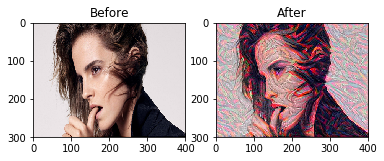

In [15]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(Image.open('content/emma1.png'))
a.set_title('Before')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(Image.open('styled_output/final_generated_image.jpg'))
a.set_title('After')